In [ ]:
!pip install -Uqq fastbook
import fastbook
from fastbook import *

     |████████████████████████████████| 727kB 17.9MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 1.2MB 38.6MB/s 
     |████████████████████████████████| 194kB 57.3MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 


In [ ]:
from fastai.vision.all import *

In [ ]:
path = Path('/content/drive/MyDrive/Colab Notebooks/simpsons/simpsons_dataset')

In [ ]:
datal = DataBlock(
     blocks=(ImageBlock, CategoryBlock), 
     get_items=get_image_files, 
     splitter=RandomSplitter (valid_pct=0.2, seed=76),
     get_y=parent_label,
     item_tfms=Resize(128))

In [ ]:
dataset =  datal.dataloaders(path)

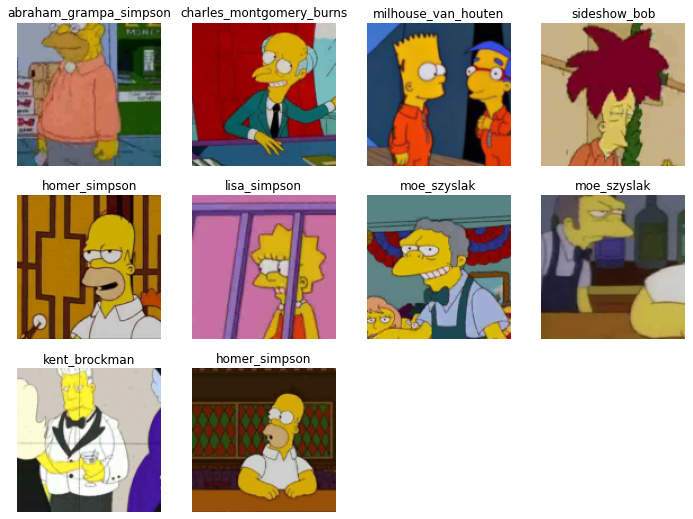

In [ ]:
dataset.train.show_batch(max_n =10)

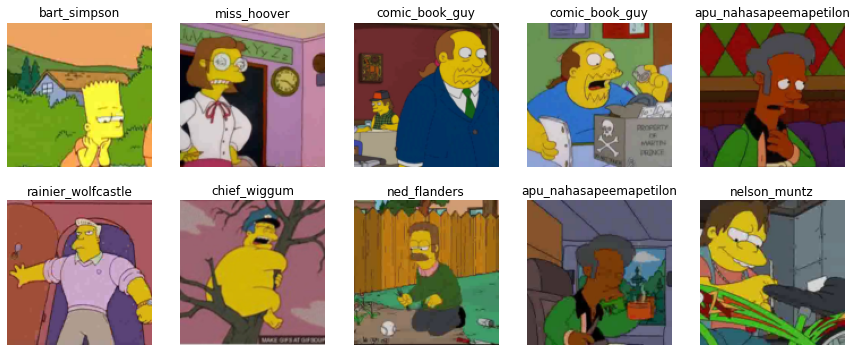

In [ ]:
dataset.valid.show_batch(max_n =10, nrows = 2)

In [ ]:
learn=cnn_learner(dataset, resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


In [ ]:
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.234878,0.772029,0.208766,2:44:09


epoch,train_loss,valid_loss,error_rate,time
0,0.366854,0.216661,0.055177,03:48
1,0.227641,0.145242,0.037382,03:47
2,0.125410,0.087725,0.021975,03:46
3,0.051634,0.051493,0.012301,03:45
4,0.019831,0.041285,0.008957,03:45
5,0.012894,0.037655,0.007763,03:44


In [ ]:
interp= ClassificationInterpretation.from_learner(learn)
interp.most_confused(min_val=3)

[]

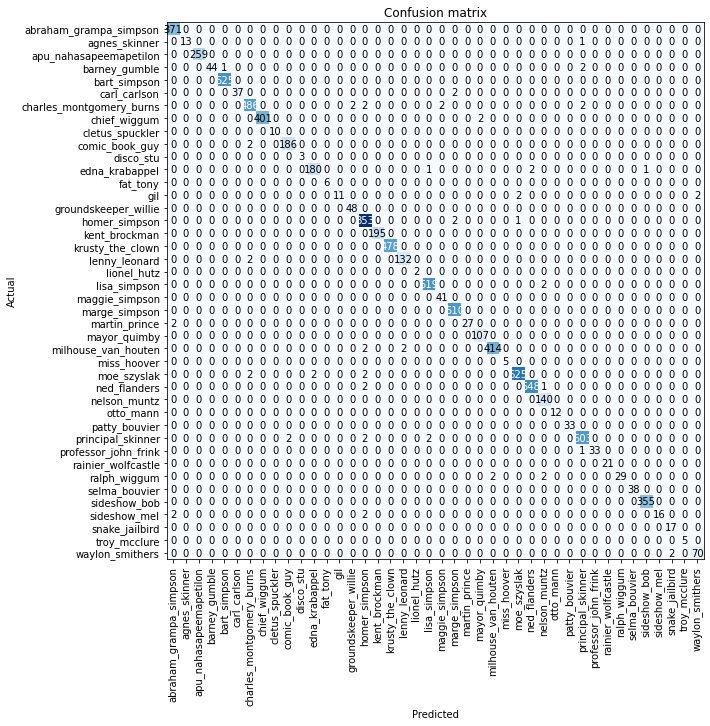

In [ ]:
interp.plot_confusion_matrix(figsize=(10,10))

In [ ]:
learn.export(fname='simpsonsResNet34.pkl')

In [ ]:
import_model = load_learner(fname='/content/drive/MyDrive/Colab Notebooks/simpsons/simpsonsResNet34.pkl')

In [ ]:
import_model.predict('/content/drive/MyDrive/Colab Notebooks/simpsons/kaggle_simpson_testset/kaggle_simpson_testset/abraham_grampa_simpson_0.jpg')[0]

'abraham_grampa_simpson'

In [ ]:
import_model.predict('/content/drive/MyDrive/Colab Notebooks/simpsons/kaggle_simpson_testset/kaggle_simpson_testset/apu_nahasapeemapetilon_38.jpg')[0]

'apu_nahasapeemapetilon'

In [ ]:
import_model.predict('/content/drive/MyDrive/Colab Notebooks/simpsons/kaggle_simpson_testset/kaggle_simpson_testset/bart_simpson_45.jpg')[0]

'bart_simpson'